<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ. <b>Классификация текстовых данных</b> </div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin.study@yandex.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Варианты</a></li>
        <li><a href="#2">Задание</a></li>
    </ol>
</div>

<p>Подключение стилей оформления</p>

In [1]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Варианты</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответвующее поле ниже и запустите ячейку:</p>

In [7]:
surname = "Баяндин" #Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 3 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  1


<div class="msg-block msg-warning">
  <p class="msg-text-warn">Варианты могут не совпадать с последующими ДЗ</p>
</div>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Задание</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<div class="msg-block msg-imp">
  <div class="msg-text-imp">
      <p>СРОК СДАЧИ: до <b>-</b></p>
      <p style="margin:0px">ПОСЛЕ СРОКА: первая неделя <b>-</b>, вторая неделя и далее до конца модуля <b>-</b>
      </p>
  </div>
</div>

<p><b>Варианты</b></p>

<ol>
    <li>
        Набор электронных сообщений (emails) - <b>спам/не спам</b> - <a href="http://csmining.org/index.php/spam-email-datasets-.html">источник</a> - файл c данными: <b>data/emails.tsv</b>
    </li>
    <li>
        Набор SMS сообщений (sms) - <b>спам/не спам</b> - <a href="https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection">источник</a> - файл c данными: <b>data/SMSSpamCollection</b>
    </li>
    <li>Набор рецензий на фильмы (reviews) - <b>positive/negative</b> - <a href="http://www.cs.cornell.edu/people/pabo/movie-review-data/">источник</a> - файл c данными: <b>data/reviews.tsv</b></li>
</ol>

<p><b>Задача 1.</b> Классификация текстовых сообщений <b><i>(2 балла)</i></b></p>

<ol>
    <li>Загрузите исходные данные</li>
    <li>Разбейте загруженные данные на обучающее (train) и тестовое подможества (test)</li>
    <li>Переведите текстовые данные в векторный вид. Для этого воcпользуйтесь средствами sklearn для конвертации текста в векторы TF-IDF (настроить на обучающем подмножестве, n-gram=1, слова в нижний регистр)</li>
    <li>Постройте на обучающем подмножестве следующие модели классификации:
        <ul>
            <li>K-ближайших соседей ($n=5$)</li>
            <li>Логистическая регрессия ($C=1$)</li>
            <li>Мультиномиальный наивный Байес ($\alpha=1$)</li> 
        </ul>
    </li>
    <li>Определите качество классификации (по доле правильных классификаций) на тестовом подмножестве</li>
    <li>Определите с помощью timeit время обучения и предсказания (на тестовом подмножестве) </li>
</ol>

#### NGRAM  = 1

In [178]:
random_state = 123  # для всех объектов/методов/моделей

from os import getcwd
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from matplotlib.colors import ListedColormap
clrMap = ListedColormap(["blue", "red", "green"])

In [119]:
# Параметры логистической регрессии
from sklearn.neighbors import KNeighborsClassifier
kme = KNeighborsClassifier(5)
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
reg = LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1, solver="lbfgs", random_state=12345)

In [183]:
# Ваш код
df = pd.read_csv("data/A3_Text_Classification/emails.tsv",sep="\t",header=None)
df.columns = ["y","x"]
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df.x.values.astype('U'))
y = df.y
x

<4326x73304 sparse matrix of type '<class 'numpy.float64'>'
	with 640076 stored elements in Compressed Sparse Row format>

In [121]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

In [113]:
%timeit reg.fit(x_train,y_train)
%timeit pred = reg.predict(x_val)
pred = reg.predict(x_val)
print("Логистическая регрессия accuracy = ",accuracy_score(y_val,pred))

433 ms ± 9.59 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
310 µs ± 9.87 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Логистическая регрессия accuracy =  0.9757505773672055


In [114]:
%timeit kme.fit(x_train,y_train)
%timeit pred = kme.predict(x_val)
pred = kme.predict(x_val)
print("K-ближайших соседей ",accuracy_score(y_val,pred))

1.74 ms ± 19.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
268 ms ± 2.51 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
K-ближайших соседей  0.4630484988452656


In [115]:
%timeit MNB.fit(x_train,y_train)
%timeit MNB.predict(x_val)
pred = MNB.predict(x_val)
print("MultinomialNB ",accuracy_score(y_val,pred))

6.66 ms ± 212 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.06 ms ± 28.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
MultinomialNB  0.8210161662817552


<p><b>Задача 2.</b> Применение k-folds <b><i>(3 балла)</i></b></p>

<p>Повторите решение задачи 1, но с ипользованием k-folds (k=4) для разделения исходных данных, обучения и тестирования.</p>

In [128]:
random_state = 123  # для всех объектов/методов/моделей

In [127]:
# Ваш код
for i,j in [(reg,"Логистическая регрессия"),(kme,"K-ближайших соседей"),(MNB,"MultinomialNB")]:
    %timeit res = cross_val_score(i,x,y,cv = 4)
    res = cross_val_score(i,x,y,cv = 4)
    print(j+" score is",res," mean is ",np.mean(res)," std is ",np.std(res))

1.34 s ± 13.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Логистическая регрессия score is [0.974122   0.97042514 0.9666975  0.96854764]  mean is  0.9699480695802647  std is  0.0027466637368405945
1.34 s ± 25.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
K-ближайших соседей score is [0.42883549 0.42698706 0.51896392 0.48011101]  mean is  0.4637243703628973  std is  0.038362722417847314
47.9 ms ± 3.71 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
MultinomialNB score is [0.8207024  0.81238447 0.82516189 0.82146161]  mean is  0.8199275932293814  std is  0.0046703861985278846


<p><b>Задача 3.</b> Выбор модели <b><i>(5 баллов)</i></b></p>

<p style="padding-left:15px;">1. Используя данные из задачи 1, разбейте обучающее подмножество (train) с использованием k-folds (k=4) <br>
2. Обучите и протестируйте на разбитом обучающем подмножестве классификаторы со следующими параметрами: </p>


<p>K-ближайших соседей</p>

In [140]:
ns = np.arange(1, 150, 20)  # количество соседей
nsres = []
for i in ns:
    kme = KNeighborsClassifier(i)
    nsres.append(np.mean(cross_val_score(kme,x,y,cv = 4)))

In [141]:
nsres

[0.6287543538963203,
 0.3374953618286621,
 0.7956656823198893,
 0.8275630492065094,
 0.8331094044160521,
 0.8365752084825955,
 0.8384227823556268,
 0.8409654407074986]

<p>Логистическая регрессия</p>

In [142]:
cs = np.logspace(-2, 10, 8, base=10)  # параметр регуляризации
csres = []
for i in cs:
    reg = LogisticRegression(C=i)
    csres.append(np.mean(cross_val_score(reg,x,y,cv = 4)))

/home/bulat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/bulat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

In [143]:
csres

[0.6814610795439973,
 0.955154012937292,
 0.9835887818665883,
 0.9833579420027666,
 0.9817399255498691,
 0.9805835888246147,
 0.980121695356357,
 0.9778090219058482]

In [152]:
csres[2],cs[2]

(0.9835887818665883, 26.826957952797247)

<p>Мультиномиальный наивный Байес</p>

In [144]:
alphas = np.logspace(-4, 1, 8, base=10)  # сглаживающий параметр
alphasres = []
for i in cs:
    MNB = MultinomialNB(alpha=i)
    alphasres.append(np.mean(cross_val_score(MNB,x,y,cv = 4)))

In [145]:
alphasres

[0.9692566186918733,
 0.8689334001344,
 0.6814610795439973,
 0.6814610795439973,
 0.6814610795439973,
 0.6814610795439973,
 0.6814610795439973,
 0.6814610795439973]

<p style="padding-left:15px;">3. Постройте графики (параметры модели)-(доля правильных классификаций) при обучении и валидации <br>
4. Выберите лучшую модель для каждого метода, используя значение качества классификации (использовать долю правильных классификаций)<br>
5. Выбранные модели обучите на обучающем подмножестве (train) и протестируйте на тестовом (test). Определите время обучения и предсказания (см. задачу 1 п. 6)<br>
6. Повторите шаги 2-4 для n-gram=2<br>
7. Выведите итоговые данные по всем методам для лучших моделей (метод, n-gram, значение параметра модели, время обучения, время предсказания, доля правильных классификаций)<br>
8. Сделайте выводы по полученным результатам (преимущества и недостатки методов)
</p>

In [148]:
random_state = 123  # для всех объектов/методов/моделей

 FOR NGRAM =1


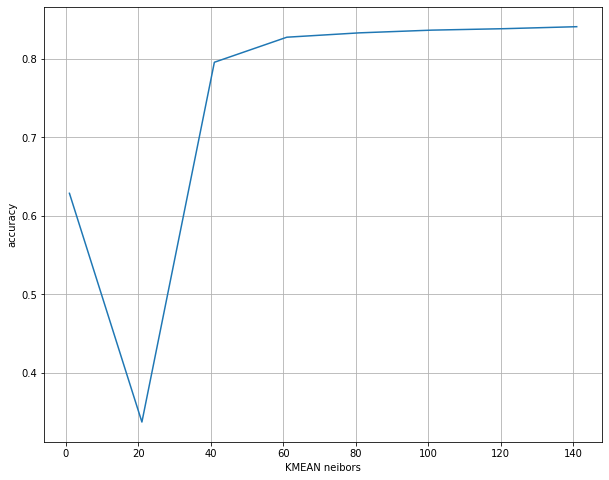

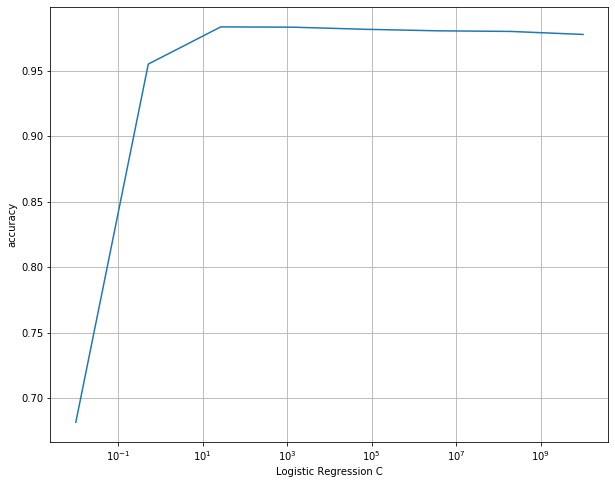

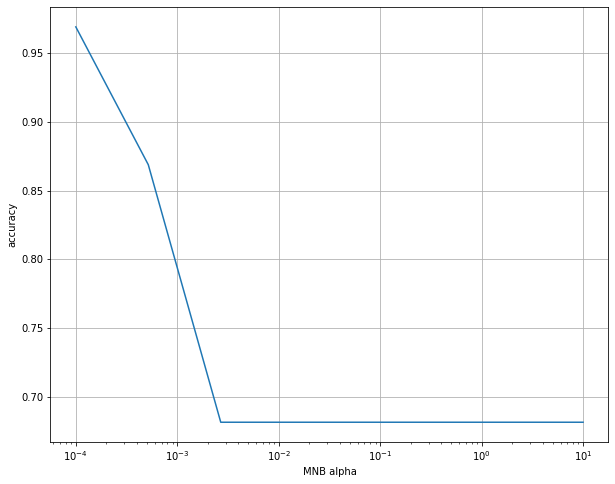

In [150]:
# Ваш код
print(" FOR NGRAM =1")
for i,j,k,n in ((ns,nsres,"KMEAN neibors",False),(cs,csres,"Logistic Regression C",True),(alphas,alphasres,"MNB alpha",True)):
    plt.figure(figsize=(10,8))
    plt.grid()
    plt.xlabel(k)
    if n:plt.xscale("log")
    plt.ylabel("accuracy")
    plt.plot(i,j)
    plt.show()

Наилучший результат показала модель линейной регрессии с точностью 0.983 и показателем С = 26.826957952797247

In [154]:
reg = LogisticRegression(C=26.826957952797247)
print("learn time is")
%timeit reg.fit(x_train,y_train)
reg.fit(x_train,y_train)
print("predict time is")
%timeit reg.predict(x_val)
res = reg.predict(x_val)
print("accuracy is ",accuracy_score(y_val,res))

learn time is
851 ms ± 5.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
predict time is
290 µs ± 2.69 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
accuracy is  0.9849884526558892


### NGRAM = 2

In [155]:
# Ваш код
df1 = pd.read_csv("data/A3_Text_Classification/emails.tsv",sep="\t",header=None)
df1.columns = ["y","x"]
vectorizer = TfidfVectorizer(ngram_range=(2,2))
x1 = vectorizer.fit_transform(df.x.values.astype('U'))
y1 = df.y

In [182]:
x1

<4326x455085 sparse matrix of type '<class 'numpy.float64'>'
	with 1020667 stored elements in Compressed Sparse Row format>

In [160]:
x_train1, x_val1, y_train1, y_val1 = train_test_split(x1, y1, test_size=0.2)

In [161]:
ns = np.arange(1, 150, 20)  # количество соседей
nsres = []
for i in ns:
    kme = KNeighborsClassifier(i)
    nsres.append(np.mean(cross_val_score(kme,x1,y1,cv = 4)))

In [162]:
nsres

[0.5090121592760862,
 0.3227002364826161,
 0.5953659324819047,
 0.891361630310813,
 0.8865028786585981,
 0.8777153607685086,
 0.87494207629343,
 0.8763283979200474]

<p>Логистическая регрессия</p>

In [163]:
cs = np.logspace(-2, 10, 8, base=10)  # параметр регуляризации
csres = []
for i in cs:
    reg = LogisticRegression(C=i)
    csres.append(np.mean(cross_val_score(reg,x1,y1,cv = 4)))

/home/bulat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/bulat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

In [164]:
csres

[0.6814610795439973,
 0.8418840978692625,
 0.9699463596553475,
 0.9778103043495361,
 0.9789659998529464,
 0.9759593106266704,
 0.9789651448904879,
 0.9757274020597755]

In [173]:
csres[4],cs[4]

(0.9789659998529464, 71968.56730011514)

<p>Мультиномиальный наивный Байес</p>

In [166]:
alphas = np.logspace(-4, 1, 8, base=10)  # сглаживающий параметр
alphasres = []
for i in cs:
    MNB = MultinomialNB(alpha=i)
    alphasres.append(np.mean(cross_val_score(MNB,x1,y1,cv = 4)))

In [167]:
alphasres

[0.9579283661154439,
 0.915624823663993,
 0.6814610795439973,
 0.6814610795439973,
 0.6814610795439973,
 0.6814610795439973,
 0.6814610795439973,
 0.6814610795439973]

In [169]:
random_state = 123  # для всех объектов/методов/моделей

 FOR NGRAM =2


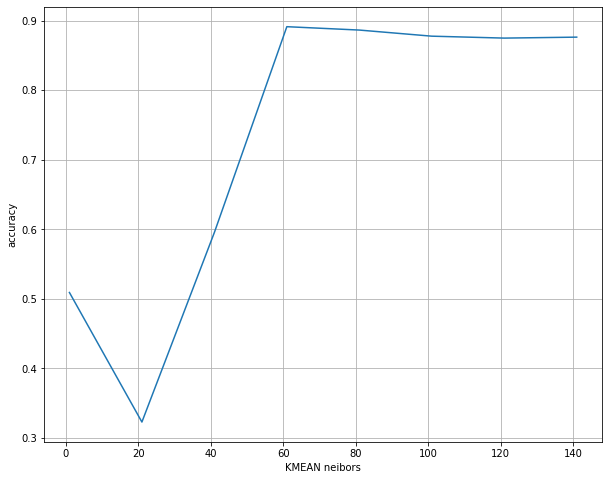

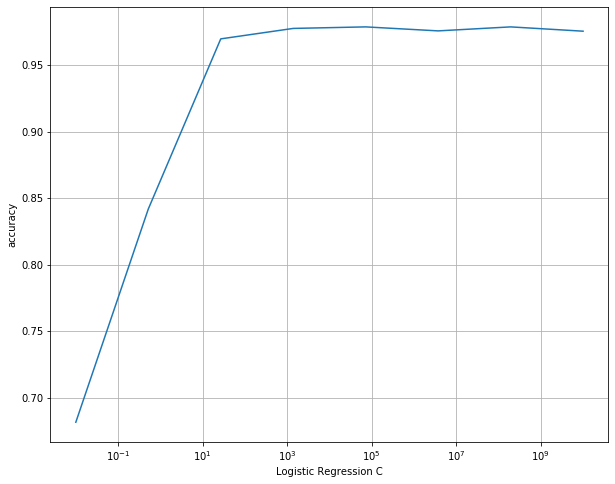

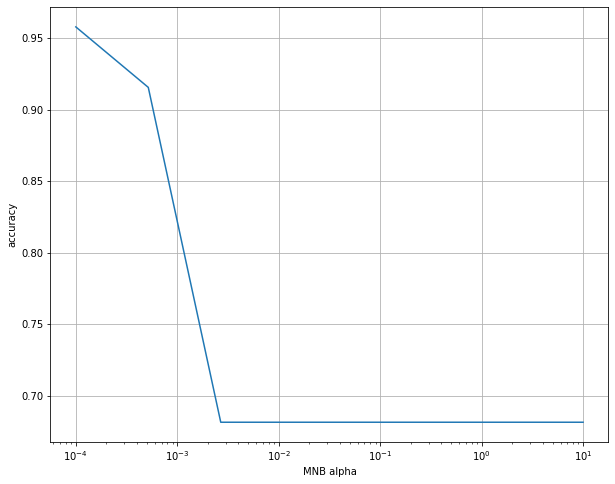

In [171]:
# Ваш код
print(" FOR NGRAM =2")
for i,j,k,n in ((ns,nsres,"KMEAN neibors",False),(cs,csres,"Logistic Regression C",True),(alphas,alphasres,"MNB alpha",True)):
    plt.figure(figsize=(10,8))
    plt.grid()
    plt.xlabel(k)
    if n:plt.xscale("log")
    plt.ylabel("accuracy")
    plt.plot(i,j)
    plt.show()

Наилучший результат показала модель линейной регрессии с точностью 0.978 и показателем С = 71968.56730011514

In [180]:
reg = LogisticRegression(C=71968.56730011514)
print("learn time is")
%timeit reg.fit(x_train1,y_train1)
reg.fit(x_train1,y_train1)
print("predict time is")
%timeit reg.predict(x_val1)
res = reg.predict(x_val1)
print("accuracy is ",accuracy_score(y_val1,res))

learn time is
5 s ± 138 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
predict time is
620 µs ± 27.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
accuracy is  0.9815242494226328


### ВЫВОД

ngram = 1

Модель линейной регрессии показала точность 0.983(на кросс валидации) с показателем С = 26.826957952797247

Время обучения модели 851 ms ± 5.04 ms per loop

Время предсказания 290 µs ± 2.69 µs per loop

Точность на тестовом датасете равна  0.9849

ngram = 2

Модель линейной регрессии показала точность 0.978(на кросс валидации) с показателем С = 71968.56730011514

Время обучения модели 5 s ± 138 ms per loop 

Время предсказания 620 µs ± 27.4 µs per loop

Точность на тестовом датасете равна  0.981

In [184]:
5/0.851,455085/73304

(5.875440658049354, 6.208187820582778)

#### Наилучшая точность была показана линейной моделью, которая была обучена на размере ngramm=1, что дало количество признаков равным 73304, и 455085 размерность признаков при ngramm = 2. Размерость существенно влияет на время обучения линейной модели, и незначительно влияет на предсказание
#### Модель линейной регрессии показала  доминирующую точность 9849% с показателем С = 26.826957952797247

<p><b>Задача 3. (опционально)</b> Исследование влияния количества признаков FeatureHasher на качество классификации <b><i>(5 баллов к сумме по всем ДЗ)</i></b></p>

<p>Как будет меняться качество классификации для обозначенных ранее методов при использовании FeatureHasher (или HashingVectorizer) из пакета sklearn перед TF-IDF преобразованием, если</p>

In [ ]:
n_features = np.logspace(1, 5, 5, base=10)  # количество признаков
non_negative=True

<p>Можно воспользоваться GridSearchCV</p>